<a href="https://colab.research.google.com/github/woodstone10/deep_learning_study-python/blob/main/Image_classification_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image (Fashion MNIST) classification

Jonggil Nam
LinkedIn: https://www.linkedin.com/in/jonggil-nam-6099a162/
Github: https://github.com/woodstone10
e-mail: woodstone10@gmail.com
phone: +82-10-8709-6299

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)

2.4.1


Let’s load Fashion MNIST
When loading MNIST or Fashion MNIST using Keras rather than Scikit-Learn, one important difference is that every image is represented as a 28×28 array rather than a 1D array of size 784.

In [4]:
Fashion_MNIST = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = Fashion_MNIST.load_data()
print("train data:", X_train.shape, y_train.shape) 
print("test data:", X_test.shape, y_test.shape)

4423680/4422102 [==============================] - 0s 0us/step
train data: (60000, 28, 28) (60000,)
test data: (10000, 28, 28) (10000,)


we just scale the pixel intensities down to the 0-1 range by dividing them by 255.0 (this also converts them to floats):

In [6]:
X_train = X_train / 255.0
X_test = X_test / 255.0
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

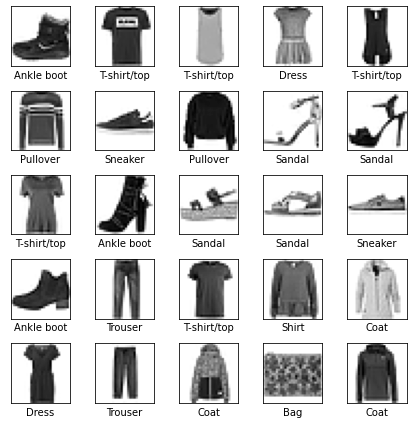

In [12]:
plt.figure(figsize=(6,6))
for i in range(25): # show 25 images
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.tight_layout()
plt.show()

In [15]:
model = \
    tf.keras.Sequential([
        # The first line creates a Sequential model. This is the simplest kind of Keras
        # model, for neural networks that are just composed of a single stack of layers, connected
        # sequentially. This is called the sequential API.
    tf.keras.layers.Flatten(input_shape=(28, 28)),
        # Next, we build the first layer and add it to the model. It is a Flatten layer whose
        # role is simply to convert each input image into a 1D array: if it receives input data
        # X, it computes X.reshape(-1, 1). This layer does not have any parameters, it is
        # just there to do some simple preprocessing. Since it is the first layer in the model,
        # you should specify the input_shape: this does not include the batch size, only the
        # shape of the instances. Alternatively, you could add a keras.layers.InputLayer
        # as the first layer, setting shape=[28,28].
    tf.keras.layers.Dense(300, activation='relu'),
        # Next we add a Dense hidden layer with 300 neurons. It will use the ReLU activation
        # function. Each Dense layer manages its own weight matrix, containing all the
        # connection weights between the neurons and their inputs. It also manages a vec‐
        # tor of bias terms (one per neuron). When it receives some input data, it computes
        # Equation 10-2.
        #
        # Other activation functions are
        # available in the keras.activations package, we will use many of
        # them in this book. See https://keras.io/activations/ for the full list.
        # - relu function : ReLU (Rectified Linear Unit) Function
        # - sigmoid function
        # - softmax function
        # - softplus function
        # - softsign function
        # - tanh function
        # - selu function
        # - elu function
        # - exponential function
    tf.keras.layers.Dense(100, activation='relu'),
        # Next we add a second Dense hidden layer with 100 neurons, also using the ReLU
        # activation function.
    tf.keras.layers.Dense(10, activation='softmax')
        # Finally, we add a Dense output layer with 10 neurons (one per class), using the
        # softmax activation function (because the classes are exclusive).
])

Compiling the Model
Keras Optimizer
- Adam: Adaptive moment estimation
- SGD: Stochastic gradient descent
- Adagrad
- AdaDelta

In [17]:
model.compile(optimizer='adam',
              #optimizer="sgd",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Let's train

In [21]:
history = model.fit(X_train, y_train, 
                    epochs=5,
                    validation_data=(X_train, y_train))

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6024 - accuracy: 0.7878 - val_loss: 0.3754 - val_accuracy: 0.8601
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3652 - accuracy: 0.8644 - val_loss: 0.3358 - val_accuracy: 0.8745
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3288 - accuracy: 0.8772 - val_loss: 0.2949 - val_accuracy: 0.8909
Epoch 4/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.3027 - accuracy: 0.8867 - val_loss: 0.2772 - val_accuracy: 0.8962
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2849 - accuracy: 0.8925 - val_loss: 0.2542 - val_accuracy: 0.9038


you get the learning curves

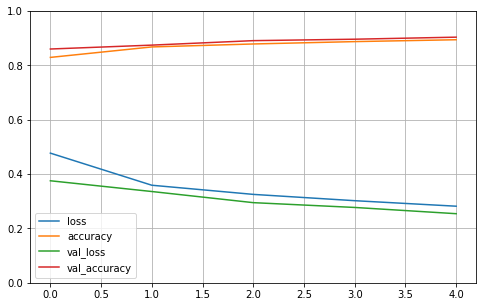

In [22]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

Validation with Test data

In [23]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('Test accuracy:', test_acc)

313/313 - 1s - loss: 0.3345 - accuracy: 0.8791
Test accuracy: 0.8791000247001648


show test data

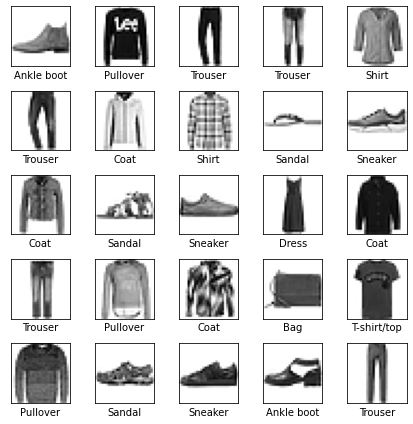

In [24]:
plt.figure(figsize=(6,6))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_test[i]])
plt.tight_layout()
plt.show()

Next, we can use the model’s predict() method to make predictions on new instances.

In [27]:
pred = model.predict(X_test)
print(pred.round(2))

[[0.   0.   0.   ... 0.04 0.   0.95]
 [0.   0.   0.99 ... 0.   0.   0.  ]
 [0.   1.   0.   ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 0.   1.   0.  ]
 [0.   1.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]]


In [29]:
def plot_image(i, predictions_array, true_label, img, class_names):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]), color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    #thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
    thisplot[predicted_label].set_color('red')

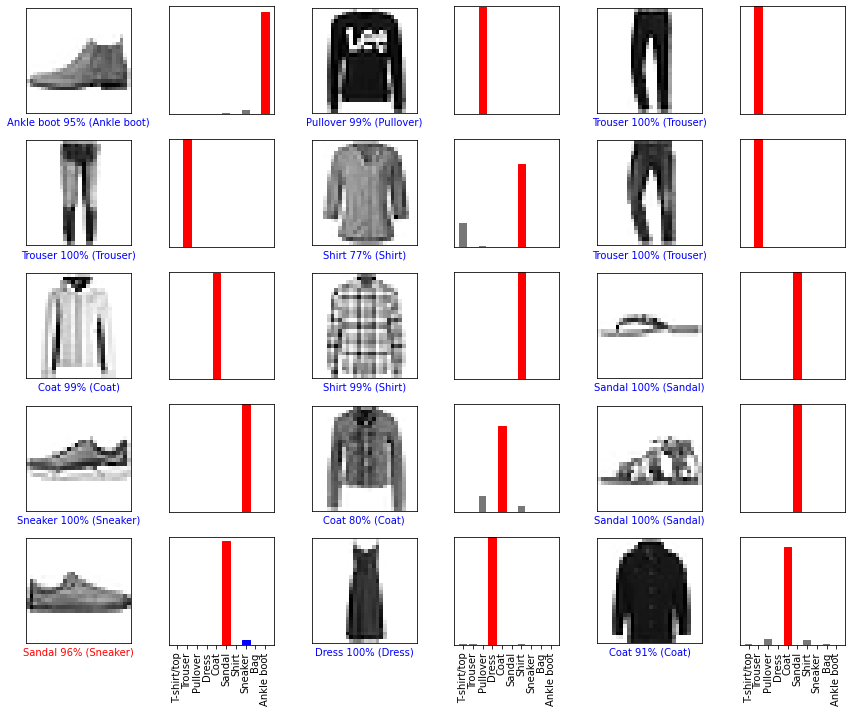

In [30]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols,2*num_rows)) 
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, pred, y_test, X_test, class_names)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, pred, y_test)
    if i >= (num_rows-1)*3: # display x-axis at last row only
        _ = plt.xticks(range(10), class_names, rotation=90)
plt.tight_layout()
plt.show()